 Buat analisis data dari permasalahan: “Shipping and Stock Performance Review on Q1 - Q2 2023”
- Data diperoleh dari database BigQuery database “thelook_ecommerce”
- Analisis data mencakup statistik descriptive, inferential, dan visualisasi data untuk menjawab permasalahan di poin pertama
- Buat notebook yang mencantumkan penjabaran masalah, query data, pengolahan data, visualisasi data dan analisis data
- Buat dashboard dari visualisasi seolah-olah kamu diminta untuk buat dashboard reporting ke Manager Gudang dan Pengiriman (buat yang menarik)
- Buat PPT untuk menceritakan analisis dan kesimpulan dari dashboard yang telah dibuat


# Introduction 

Sebagai seorang analis data yang berdedikasi dan memiliki passion dalam mengungkap wawasan dari data, saya memulai proyek ini untuk meningkatkan keterampilan analisis saya sekaligus menunjukkan kemampuan saya dalam menghasilkan solusi bisnis yang dapat diimplementasikan. Proyek ini menggunakan dataset yang tersedia secara publik dari Google Cloud Platform, dengan dataset the look ecommerce. Disini saya akan membuat nama sebuah perusahaan fiktif untuk menciptakan narasi menarik tentang operasional mereka dan mengeksplorasi peluang pertumbuhan serta optimalisasi dari perusahaan yang akan saya analisa. 

Latar Belakang Shopay Ecommerce

Shopay Ecommerce, didirikan pada tahun 2015, adalah platform retail online terkemuka yang dikenal karena ragam produknya yang luas, mulai dari elektronik dan pakaian hingga kebutuhan rumah tangga dan aksesori. Berkantor pusat di Jakarta, perusahaan ini tumbuh secara eksponensial dan melayani jutaan pelanggan di seluruh Indonesia. Dengan mengutamakan kepuasan pelanggan, Shopay telah membangun reputasi untuk pengalaman belanja yang lancar, harga yang kompetitif, dan layanan pengiriman yang cepat.Di inti operasional Shopay terletak komitmen terhadap inovasi dan pemanfaatan strategi berbasis data untuk memenuhi kebutuhan pelanggan. Dengan katalog produk yang beragam dan jaringan logistik yang kuat, perusahaan ini bersaing dengan raksasa di sektor e-commerce, menciptakan keunikannya dengan berfokus pada personalisasi dan kampanye pemasaran lokal. 

Manajer gudang memberikan perintah kepada saya untuk memberikan report mengenai performa dari gudang untuk tahun 2023, report ini dikhususkan untuk quarter 1 dan quarter 2 dari tahun 2023. Pembahasan selanjutnya akan Problem statement dan Problem Breakdown. 

## Problem Statement 

Dalam periode Q1 hingga Q2 tahun 2023, perusahaan menghadapi tantangan dalam memastikan efisiensi proses pengiriman dan pengelolaan stok barang. Terdapat beberapa laporan keterlambatan pengiriman serta ketidaksesuaian antara permintaan pasar. Hal ini menyebabkan penurunan tingkat kepuasan pelanggan sebesar 15% dibandingkan dengan semester sebelumnya, sekaligus meningkatkan biaya operasional akibat kelebihan stok pada kategori tertentu dan kekurangan stok pada kategori lainnya. Untuk mengatasi masalah ini, perlu dilakukan analisis mendalam terhadap kinerja pengiriman dan pengelolaan stok guna mengidentifikasi akar permasalahan dan merumuskan strategi peningkatan.

## Problem Breakdown

1. Bagaimana komposisi pelanggan kita berdasarkan gender ? 
2. Seperti apa komposisi keseluruhan status pesanan kita selama 6 bulan terakhir?
3. Adakah indikasi produk tertentu, kategori tertentu yang mendominasi dalam order order yang tercancel ? 
4. Adakah indikasi produk tertentu, kategori tertentu yang mendominasi dalam order order yang dikembalikan (return) ?
5. Kategori mana yang memiliki aktivitas order tertinggi tunjukkan 10 ? 
6. Kategori mana yang memiliki aktivitas order terendah tunjukkan 10 ? 
7. Tunjukkan diagram distribusi dari cost dan price retail ? 
8. Brand mana yang menjadi brand terlaris selama 6 bulan ini? Top 10 
9. Tunjukkan data historis total order setiap bulan selama 6 bulan terakhir ? 
10. Berapa jumlah item per order ? 
11. Histogram lama pengiriman dalam jam ? 
12. Apakah terdapat distribution ID yang mayoritas digunakan ? 

# Importing Libraries 

In [1]:
# Importing library yang dibutuhkan pada analisis kali ini

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

# Data Loading 

Data ini diambil dari [source](https://console.cloud.google.com/bigquery?project=rock-wonder-317907&ws=!1m4!1m3!3m2!1sbigquery-public-data!2sthelook_ecommerce), data ini merupakan data free  yang bisa dipakai sebagai bahan latihan dan disediakan oleh google. Data telah saya ambil sendiri menggunakan google cloud platform dengan menggunakan SQL languange. 

Berikut merupakan data yang telah saya ambil. 




In [2]:
df= pd.read_csv('thelook_3.csv')
df.head()

,order_id,inventory_item_id,gender,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id
0,124266,487074,F,Shipped,2023-05-15 06:25:24.000000 UTC,2023-05-11 19:08:00.000000 UTC,NaN,NaN,0.02,4,NaN,0.00830,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,1
1,92782,363599,F,Complete,2023-02-20 15:55:38.000000 UTC,2023-02-21 17:53:00.000000 UTC,2023-02-25 20:43:00.000000 UTC,NaN,0.49,2,NaN,0.17738,Accessories,Set of 2 - Replacement Insert For Checkbook Wa...,Made in USA,0.49,Women,1
2,29061,113659,M,Processing,2023-01-28 00:48:32.000000 UTC,NaN,NaN,NaN,1.50,2,NaN,0.60600,Accessories,Wayfarer Style Sunglasses Dark Lens Black Frame,Wayfayrer,1.50,Men,8
3,83488,327211,M,Returned,2023-04-26 04:08:20.000000 UTC,2023-04-26 15:20:00.000000 UTC,2023-04-28 23:59:00.000000 UTC,2023-04-30 13:08:00.000000 UTC,1.50,1,NaN,0.60600,Accessories,Wayfarer Style Sunglasses Dark Lens Black Frame,Wayfayrer,1.50,Men,8
4,28402,111135,F,Cancelled,2023-04-02 03:21:08.000000 UTC,NaN,NaN,NaN,1.51,4,NaN,0.64477,Accessories,Solid Color Leather Adjustable Skinny Belt with,boxed-gifts,1.51,Women,10


Dataset diatas merupakan dataset yang akan kita lakukan proses analisis. Terlihat pada dataset diatas terdapat order_id dan inventory item id sebagai penjelasan setiap dari ID. Kemudian kita bisa menemukan kolom dibuat tanggal, dikirim pada, jumlah item dan item yang terjual. Terdapat juga penjelasan product name, brand dan beberapaketerangan mengenai harga dan departemen serta paling akhir terdapat distribution center. 

## Data Exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17423 entries, 0 to 17422
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   order_id                        17423 non-null  int64  
 1   inventory_item_id               17423 non-null  int64  
 2   gender                          17423 non-null  object 
 3   status                          17423 non-null  object 
 4   created_at                      17423 non-null  object 
 5   shipped_at                      11472 non-null  object 
 6   delivered_at                    6208 non-null   object 
 7   returned_at                     1741 non-null   object 
 8   sale_price                      17423 non-null  float64
 9   num_of_item                     17423 non-null  int64  
 10  sold_at                         0 non-null      float64
 11  cost                            17423 non-null  float64
 12  product_category                

Di atas terdapat penjelasan singkat mengenai bagaimana bentuk data jumlah kolom dan beberapa informasi mengenai total jumlah non null. Yang menarik disini, terlihat pada kolom sold_at terdapa 0 non null. Ini berarti bahwa kolom tersebut tidak memiliki isi, semua baris merupakan kolom kosong maka kita bisa membuang kolom sold_at tersebut. 

Kita pindah ke nama kolom tidak ada whitespace terlihat disini akan coba kita cek ulang nanti. Dari Dtype sepertinya type sudah banyak yang benar. Type data yang salah ada beberapa terdapat pada penanggalan seperti created_at, delivered_at, dsb. Di kolom-kolom bertipe tanggal tersebut, kita akan mengganti type kolom tersebut sesuai dengan yang dibutuhkan oleh sistem. 

In [4]:
# Melihat total baris dan kolom
df.shape

(17423, 18)

Terlihat disini dataset memiliki 17ribu baris dan 18 kolom. 

In [5]:
# cek kolom
df.columns

Index(['order_id', 'inventory_item_id', 'gender', 'status', 'created_at',
       'shipped_at', 'delivered_at', 'returned_at', 'sale_price',
       'num_of_item', 'sold_at', 'cost', 'product_category', 'product_name',
       'product_brand', 'product_retail_price', 'product_department',
       'product_distribution_center_id'],
      dtype='object')

Dari penamaan kolom tidak terdapat whitespace dataset aman. 

In [6]:
#cek missing value
df.isna().sum()

order_id                              0
inventory_item_id                     0
gender                                0
status                                0
created_at                            0
shipped_at                         5951
delivered_at                      11215
returned_at                       15682
sale_price                            0
num_of_item                           0
sold_at                           17423
cost                                  0
product_category                      0
product_name                          1
product_brand                        15
product_retail_price                  0
product_department                    0
product_distribution_center_id        0
dtype: int64

Terlihat disini masih terdapat beberapa missing value, missing value banyak terjadi kolom kolom penanggalan. Secara logika itu masuk akal. Sebagai contoh kasus,  memang mungkin barang itu sudah 
terkirim, sehingga tidak ada tulisan barang kembali pada kolom returned at. Jadi pada kolom returned_at pasti akan menjadi kolom missing value

Sold at semua missing value sudah kita bahas sebelumnya. Untuk produk brand kita lihat secara mendetail. Apakah kolom lainnya masih bisa dimanfaatkan atau tidak untuk analisis data. 

In [7]:
# Cek duplikasi data 
df.duplicated().sum()

0

Tidak terdapat duplikasi kolom. Kita bisa langsung menuju ke section data cleaning. 

# Data Cleaning 

In [8]:
# drop column sold at
df = df.drop('sold_at', axis=1)
df.columns

Index(['order_id', 'inventory_item_id', 'gender', 'status', 'created_at',
       'shipped_at', 'delivered_at', 'returned_at', 'sale_price',
       'num_of_item', 'cost', 'product_category', 'product_name',
       'product_brand', 'product_retail_price', 'product_department',
       'product_distribution_center_id'],
      dtype='object')

Terlihat pada gambar diatas kolom sold at sudah tidak ada. 

In [9]:
# cek sale_price dan product_retail_price
df.iloc[:10,[8,14]]

,sale_price,product_retail_price
0,0.02,0.02
1,0.49,0.49
2,1.50,1.50
3,1.50,1.50
4,1.51,1.51
5,1.51,1.51
6,1.82,1.82
7,1.82,1.82
8,1.95,1.95
9,2.67,2.67


Terlihat pada 10 baris pertama antara kolom saleprice dan product retail price memiliki nilai yang sama. DIsini kita bisa membuang salah satu. Kita buang product retail price saja. 

In [10]:
# drop column sold at
df = df.drop('product_retail_price', axis=1)
df.columns

Index(['order_id', 'inventory_item_id', 'gender', 'status', 'created_at',
       'shipped_at', 'delivered_at', 'returned_at', 'sale_price',
       'num_of_item', 'cost', 'product_category', 'product_name',
       'product_brand', 'product_department',
       'product_distribution_center_id'],
      dtype='object')

Terlihat pada product retail price sudah tidak ada di isi dari kolom dataset. 

In [11]:
df[df['product_brand'].isna()].head()

,order_id,inventory_item_id,gender,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,cost,product_category,product_name,product_brand,product_department,product_distribution_center_id
62,94894,371766,F,Cancelled,2023-06-09 05:22:56.000000 UTC,NaN,NaN,NaN,4.21,4,1.64190,Accessories,NEW Aluminum Credit Card Wallet - RFID Blockin...,NaN,Women,3
63,67991,266382,F,Complete,2023-04-21 01:50:57.000000 UTC,2023-04-22 23:05:00.000000 UTC,2023-04-25 19:40:00.000000 UTC,NaN,4.21,1,2.23551,Plus,NEW Aluminum Credit Card Wallet - RFID Blockin...,NaN,Women,3
3960,107229,420168,M,Cancelled,2023-03-05 01:52:07.000000 UTC,NaN,NaN,NaN,22.48,2,12.47640,Socks,Volcom Men's Argyle Socks,NaN,Men,3
4373,56692,222162,F,Complete,2023-02-16 13:51:13.000000 UTC,2023-02-17 13:07:00.000000 UTC,2023-02-19 06:16:00.000000 UTC,NaN,24.25,2,9.55450,Accessories,Husky Animal Hat with Mittens,NaN,Women,3
4692,60964,238980,M,Cancelled,2023-06-04 13:03:50.000000 UTC,NaN,NaN,NaN,25.00,2,14.42500,Socks,SockGuy Men's Kokopelli Socks,NaN,Men,3


Terlihat disini pada kolom lain memang memiliki isi, kemungkinan memang pada produk itu memang tidak mempunyai nama. Jadi, kita bisa membiarkan kolom missing value pada product brand. 

In [12]:
df.iloc[:10,3:8]

,status,created_at,shipped_at,delivered_at,returned_at
0,Shipped,2023-05-15 06:25:24.000000 UTC,2023-05-11 19:08:00.000000 UTC,NaN,NaN
1,Complete,2023-02-20 15:55:38.000000 UTC,2023-02-21 17:53:00.000000 UTC,2023-02-25 20:43:00.000000 UTC,NaN
2,Processing,2023-01-28 00:48:32.000000 UTC,NaN,NaN,NaN
3,Returned,2023-04-26 04:08:20.000000 UTC,2023-04-26 15:20:00.000000 UTC,2023-04-28 23:59:00.000000 UTC,2023-04-30 13:08:00.000000 UTC
4,Cancelled,2023-04-02 03:21:08.000000 UTC,NaN,NaN,NaN
5,Cancelled,2023-05-16 23:46:59.000000 UTC,NaN,NaN,NaN
6,Returned,2023-05-03 08:06:23.000000 UTC,2023-05-03 08:33:00.000000 UTC,2023-05-06 08:56:00.000000 UTC,2023-05-08 04:24:00.000000 UTC
7,Returned,2023-03-07 00:55:08.000000 UTC,2023-03-05 07:36:00.000000 UTC,2023-03-05 15:52:00.000000 UTC,2023-03-07 03:43:00.000000 UTC
8,Shipped,2023-01-22 02:55:29.000000 UTC,2023-01-19 21:01:00.000000 UTC,NaN,NaN
9,Shipped,2023-01-22 11:50:46.000000 UTC,2023-01-24 18:15:00.000000 UTC,NaN,NaN


Disini terlihat bahwa memang seperti pelaporan tanggal untuk kolom koolom diatas. Jadi kolom diatas bisa dirubah ke penanggalan. 

In [13]:
# Ubah semua kolom tanggal ke datetime
df[['created_at', 'shipped_at', 'delivered_at', 'returned_at']] = df[['created_at', 'shipped_at', 'delivered_at', 'returned_at']].apply(pd.to_datetime, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17423 entries, 0 to 17422
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   order_id                        17423 non-null  int64              
 1   inventory_item_id               17423 non-null  int64              
 2   gender                          17423 non-null  object             
 3   status                          17423 non-null  object             
 4   created_at                      17423 non-null  datetime64[ns, UTC]
 5   shipped_at                      11472 non-null  datetime64[ns, UTC]
 6   delivered_at                    6208 non-null   datetime64[ns, UTC]
 7   returned_at                     1741 non-null   datetime64[ns, UTC]
 8   sale_price                      17423 non-null  float64            
 9   num_of_item                     17423 non-null  int64              
 10  cost      

kolom tanggal sudah sesuai type data menjadi datetime. 

In [14]:
# cek kolom mencurigakan 
df.iloc[1:5,[2,14]]

,gender,product_department
1,F,Women
2,M,Men
3,M,Men
4,F,Women


Pada kolom departemen dan gender ternyata memiliki kolom yang sama jadi kolom ini bisa kita kita hapus salah satu. 

In [15]:
# drop column sold at
df = df.drop('product_department', axis=1)
df.columns

Index(['order_id', 'inventory_item_id', 'gender', 'status', 'created_at',
       'shipped_at', 'delivered_at', 'returned_at', 'sale_price',
       'num_of_item', 'cost', 'product_category', 'product_name',
       'product_brand', 'product_distribution_center_id'],
      dtype='object')

# EDA 

In [16]:
df.describe()

,order_id,inventory_item_id,sale_price,num_of_item,cost,product_distribution_center_id
count,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000
mean,62643.203581,245439.179705,58.794131,1.896172,28.222176,5.027091
std,35897.689581,140710.043482,63.099238,1.067334,29.004822,2.896992
min,21.000000,89.000000,0.020000,1.000000,0.008300,1.000000
25%,31460.500000,123032.500000,24.059999,1.000000,11.325000,2.000000
50%,62672.000000,245589.000000,39.990002,2.000000,19.489821,5.000000
75%,93461.000000,366279.000000,69.500000,2.000000,34.194750,8.000000
max,125100.000000,490413.000000,999.000000,4.000000,437.052001,10.000000


pada dataset terlihat bahwa rata-rata harga dari barang adalah 58 dan rata rata jumlah item adalah 1,89. Biaya yang dikeluarkan juga memiliki rata-rata 28. Bisa dibilang keuntungan ini cukup mantap karena hampir 100% keuntungan yang diambil. 

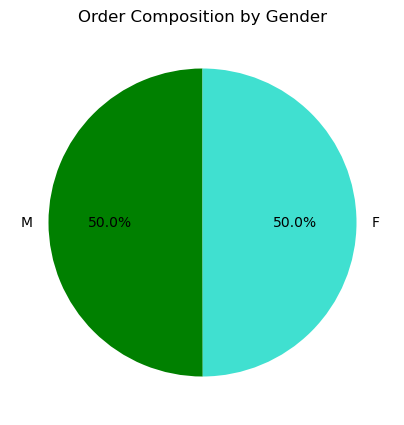

In [17]:
# Menghitung jumlah response rate tahun lalu 

# Total_Count_Value Response 
gender_count = df['gender'].value_counts()


# Pembuatan pie chart 
plt.figure(figsize=(5, 5))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['green','turquoise'])
plt.title('Order Composition by Gender')
plt.show()

Kedua departemen, yaitu departemen wanita dan pria, memiliki proporsi kontribusi yang setara berdasarkan total komposisi pemesanan selama enam bulan terakhir, yang menunjukkan distribusi yang seimbang. Oleh karena itu, penting untuk menerapkan kebijakan penyetaraan di berbagai aspek, seperti penelitian dan pengembangan (R&D), pemasaran, penjualan, atau bidang lain yang dapat mendorong kemajuan bersama. Tidak ada perlakuan berbeda terhadap salah satu departemen, karena keduanya memiliki peran yang sama pentingnya dalam mendorong keberhasilan organisasi.

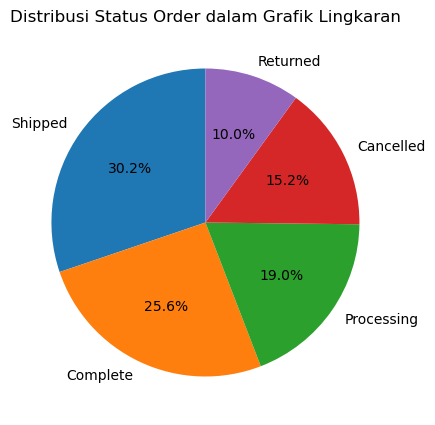

In [18]:
# Menghitung jumlah response rate tahun lalu 

# Total_Count_Value Response 
gender_count = df['status'].value_counts()


# Pembuatan pie chart 
plt.figure(figsize=(5, 5))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Order dalam Grafik Lingkaran')
plt.show()

Analisis Grafik Distribusi Status Order

Grafik distribusi status order menunjukkan bahwa proporsi terbesar ditempati oleh status "shipped" sebesar 30%, diikuti oleh status "complete" di posisi kedua, sementara status "returned" berada di urutan terakhir dengan proporsi 10%. Proporsi "returned" ini perlu diminimalkan, karena tingginya pengembalian barang dapat menunjukkan ketidaksesuaian produk dengan harapan konsumen, yang berpotensi merugikan operasional.

Sorotan utama dalam analisis ini adalah status "shipped", yang angkanya cukup signifikan. Status ini menimbulkan ambiguitas terkait kejelasan proses pengiriman, dengan beberapa pertanyaan yang perlu dijawab:

Apakah barang sudah sampai ke tangan konsumen?
Apakah barang hilang selama proses pengiriman?
Apakah barang sebenarnya belum dikirim oleh penjual?
Langkah selanjutnya adalah meninjau lebih dalam data dengan status "shipped" untuk mencari informasi tambahan, seperti bukti pengiriman, tanggal pengiriman, dan kemungkinan kendala pengiriman.

Selain itu, proporsi status "processing" sebesar 19% juga cukup tinggi, menunjukkan bahwa banyak pesanan masih berada dalam tahap awal pemrosesan atau keranjang. Kolaborasi lintas divisi diperlukan untuk mengurangi angka ini, misalnya dengan mendorong pelanggan menyelesaikan transaksi melalui notifikasi pengingat atau promosi.

Hal yang positif dari grafik ini adalah status "complete" berada di posisi kedua. Jika ambiguitas pada status "shipped" dapat diatasi dan statusnya ditingkatkan menjadi "complete", maka proporsi status "complete" dapat menjadi yang tertinggi, seperti yang idealnya diharapkan dalam sebuah sistem e-commerce.

Rekomendasi:
Langkah berikut yang perlu diambil adalah:

Melakukan investigasi lebih dalam pada status "shipped" untuk memperjelas prosesnya.
Berkoordinasi dengan tim terkait untuk memastikan pesanan pada status "shipped" segera ditindaklanjuti hingga menjadi "complete".
Menerapkan strategi untuk meminimalkan jumlah pesanan yang berada di status "processing", sehingga proses transaksi lebih efisien.

In [19]:
df[df['status']== 'Shipped']


,order_id,inventory_item_id,gender,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,cost,product_category,product_name,product_brand,product_distribution_center_id
0,124266,487074,F,Shipped,2023-05-15 06:25:24+00:00,2023-05-11 19:08:00+00:00,NaT,NaT,0.02,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,1
8,40445,158205,F,Shipped,2023-01-22 02:55:29+00:00,2023-01-19 21:01:00+00:00,NaT,NaT,1.95,4,0.772200,Socks & Hosiery,Pink Ribbon Breast Cancer Awareness Knee High ...,Palmetto Fundraising,7
9,37038,144994,F,Shipped,2023-01-22 11:50:46+00:00,2023-01-24 18:15:00+00:00,NaT,NaT,2.67,1,1.100040,Accessories,Retractable Colorful Rhinestone Lanyards with ...,Coloriffics,2
17,55396,217102,M,Shipped,2023-04-28 12:31:28+00:00,2023-04-28 07:51:00+00:00,NaT,NaT,2.99,4,1.187030,Accessories,Aviator Sunglasses Mirror Lens Silver Metal Fr...,Urban Boundaries Eyewear,5
23,53243,208707,M,Shipped,2023-01-31 13:07:20+00:00,2023-02-03 12:25:00+00:00,NaT,NaT,3.29,1,1.217300,Accessories,TopTie Unisex New Fashion White and Black Keyb...,TopTie,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17401,1897,7594,F,Shipped,2023-06-23 00:19:51+00:00,2023-06-24 18:31:00+00:00,NaT,NaT,588.00,1,247.548000,Sweaters,Magaschoni Women's 100% Cashmere Cable Sweater...,Magaschoni,1
17402,17922,70193,M,Shipped,2023-03-16 16:56:10+00:00,2023-03-14 22:22:00+00:00,NaT,NaT,595.00,4,270.725001,Outerwear & Coats,Men's Classic Sheepskin B-3 Bomber Jacket,Overland Sheepskin Co,1
17405,23887,93502,M,Shipped,2023-04-02 14:38:44+00:00,2023-04-04 11:44:00+00:00,NaT,NaT,650.00,1,308.750001,Outerwear & Coats,Mountain Hardwear Men's Nilas Down Jacket,Mountain Hardwear,7
17410,55914,219086,M,Shipped,2023-06-19 05:10:31+00:00,2023-06-18 10:18:00+00:00,NaT,NaT,815.00,2,378.160001,Outerwear & Coats,Canada Goose Men's The Chateau Jacket,Canada Goose,1


Kejelasan Status Order dalam Database

Pada kolom terkait status order, terdapat ketidakjelasan apakah pesanan telah selesai atau masih dalam proses (on-going). Hal ini terlihat dari kolom "returned_at" dan "delivered_at", yang sebagian besar nilainya kosong, sehingga sulit untuk memastikan status akhir dari pesanan tersebut. Kejelasan dalam status "shipped" sangat diperlukan agar proses manajemen pesanan lebih terorganisir dan dapat memberikan wawasan yang lebih akurat.

Jika status "shipped" berubah menjadi "complete", maka idealnya ada tindakan dari pihak pembeli maupun penjual untuk memastikan transisi tersebut. Beberapa langkah yang dapat diambil untuk mendukung hal ini antara lain:

Pemberian Rating oleh Pembeli: Membuka opsi bagi pembeli untuk memberikan rating atau ulasan setelah pesanan diterima sebagai indikator bahwa transaksi telah selesai.
Notifikasi Email Otomatis: Mengirimkan email kepada pembeli untuk mengonfirmasi status pesanan, seperti permintaan konfirmasi penerimaan barang.
Perbaikan Sistem Tracking: Mengintegrasikan status pengiriman dari jasa kurir ke dalam sistem database untuk memantau secara real-time perubahan status pesanan.
Dengan melakukan langkah-langkah ini, kerapian dan konsistensi data dalam database dapat terjaga, yang akan mempermudah analisis performa pesanan serta meningkatkan pengalaman pelanggan

In [20]:
df[df['status']=='Cancelled']['product_distribution_center_id'].value_counts()

product_distribution_center_id
1     334
2     326
3     313
8     280
7     274
9     273
4     256
6     239
5     180
10    172
Name: count, dtype: int64

In [21]:
df[df['status']=='Cancelled']['product_category'].value_counts()

product_category
Sweaters                         193
Intimates                        182
Tops & Tees                      179
Sleep & Lounge                   169
Fashion Hoodies & Sweatshirts    167
Jeans                            165
Shorts                           153
Swim                             151
Accessories                      149
Outerwear & Coats                135
Active                           117
Underwear                        107
Pants                            106
Socks                            104
Suits & Sport Coats               97
Maternity                         79
Dresses                           70
Blazers & Jackets                 61
Plus                              59
Pants & Capris                    53
Socks & Hosiery                   53
Leggings                          45
Skirts                            22
Jumpsuits & Rompers               15
Suits                             12
Clothing Sets                      4
Name: count, dtype: i

In [22]:
df[df['status']=='Cancelled']['gender'].value_counts()


gender
M    1349
F    1298
Name: count, dtype: int64

In [23]:
df[df['status']=='Cancelled'].shape

(2647, 15)

In [24]:
df[df['status']=='Cancelled']['product_brand'].value_counts()

product_brand
Allegra K       117
Calvin Klein     49
Carhartt         30
Quiksilver       25
Diesel           24
               ... 
Cuddl Duds        1
Clever            1
ScotlandShop      1
Skinnygirl        1
NAU               1
Name: count, Length: 884, dtype: int64

Setelah dilakukan slicing untuk fitur cancelled tidak diketemukan pola yang konsisten atau mencolok terkait kategori produk, brand , gender pelanggan atau aspek lainnya yang dapat menjelaskan banyaknya order yang dibatalkan. Meskipun produk sweaters dan intimates menempati urutan pertama dan kedua sebagai kategori produk yang paling sering dibatalkan, jumlahnya masing-masing hanya sekitar 190 dari total 2600 order yang dibatalkan. Angka ini bahkan tidak mencapai 10% dari total order yang dibatalkan. 

Dari analisis ini, dapat disimpulkan bahwa tidak ada pola signifikan yang menunjukkan penyebab pasti dari order yang dibatalkan berdasarkan identifikasi produk, brand atau karakteristik pelanggan tertentu. 

In [25]:
df[df['status']=='Returned']['product_distribution_center_id'].value_counts()

product_distribution_center_id
2     244
1     235
3     191
8     182
4     170
9     161
7     158
6     151
5     130
10    119
Name: count, dtype: int64

In [26]:
df[df['status']=='Returned']['product_category'].value_counts()

product_category
Intimates                        123
Jeans                            121
Sleep & Lounge                   116
Sweaters                         113
Fashion Hoodies & Sweatshirts    107
Accessories                      106
Tops & Tees                      101
Shorts                           101
Swim                              99
Active                            98
Pants                             83
Outerwear & Coats                 74
Underwear                         63
Socks                             54
Suits & Sport Coats               54
Dresses                           51
Plus                              50
Maternity                         48
Leggings                          44
Blazers & Jackets                 39
Socks & Hosiery                   35
Pants & Capris                    24
Skirts                            19
Jumpsuits & Rompers                9
Suits                              7
Clothing Sets                      2
Name: count, dtype: i

In [27]:
df[df['status']=='Returned']['gender'].value_counts()

gender
M    871
F    870
Name: count, dtype: int64

Pada analisis slicing untuk status order 'Returned' ditemukan bahwa tidak ada pola dominan yang telihat dari kategori produk , brand ataupun gender pelanggan terhadap produk-produk yang dikembalikan. Berdasarkan temuan ini dapat disimpulkan bahwa upaya untuk mengurangi produk return tidak dapat difokuskan pada satu fitur tertentu saja. Sebaliknya, pendekatan yang lebih holistik diperlukan untuk mencakup semua kategori pelanggan secara keseluruhan. Kesimpulan ini juga diperkuat oleh data dari status order returned ataupun cancelled yang menunjukkan pola serupa. 

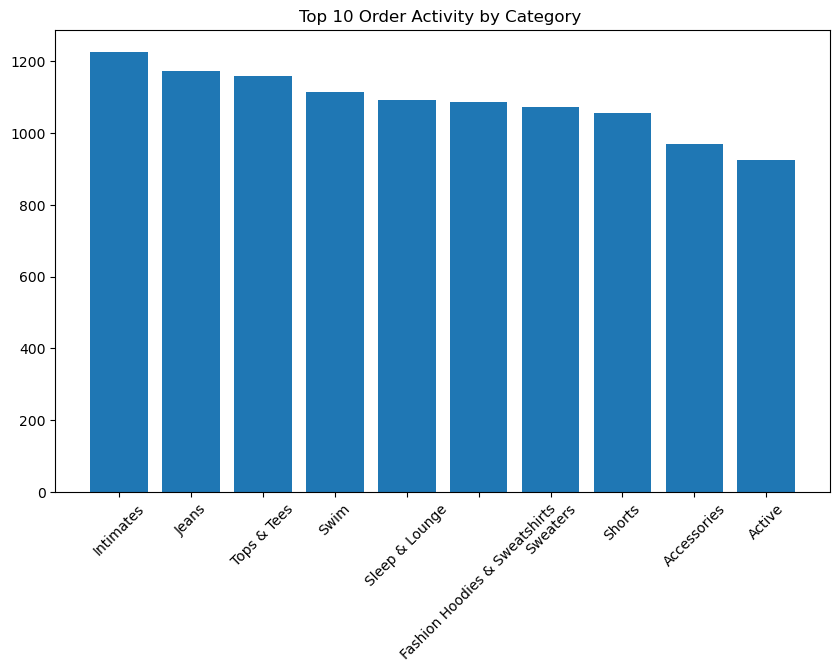

In [28]:
# Total_Count_Value Response 
category_count = df['product_category'].value_counts(ascending = False).head(10)

# buat graph
plt.figure(figsize=(10, 6))  # Atur ukuran figure (lebar, tinggi)
plt.bar(category_count.index, category_count.values)  # Pastikan sumbu x dan y benar
plt.xticks(rotation = 45)
plt.title('Top 10 Order Activity by Category ')
plt.show()

Grafik di atas menunjukkan distribusi 10 kategori terlaris dalam aktivitas order. Hasilnya mengindikasikan bahwa jarak antar kategori tidak jauh berbeda, sehingga tidak ada kategori yang secara signifikan mendominasi. Performanya relatif merata, membuat pola atau insight spesifik sulit untuk diidentifikasi.

Distribusi yang merata ini dapat diartikan bahwa strategi pengelolaan stok atau pemasaran perlu menargetkan kategori secara menyeluruh, karena tidak ada satu kategori yang berperan sebagai penggerak utama. Langkah selanjutnya adalah mencari pola tambahan, misalnya melalui analisis tren waktu atau distribusi geografis, untuk mendapatkan insight lebih mendalam.

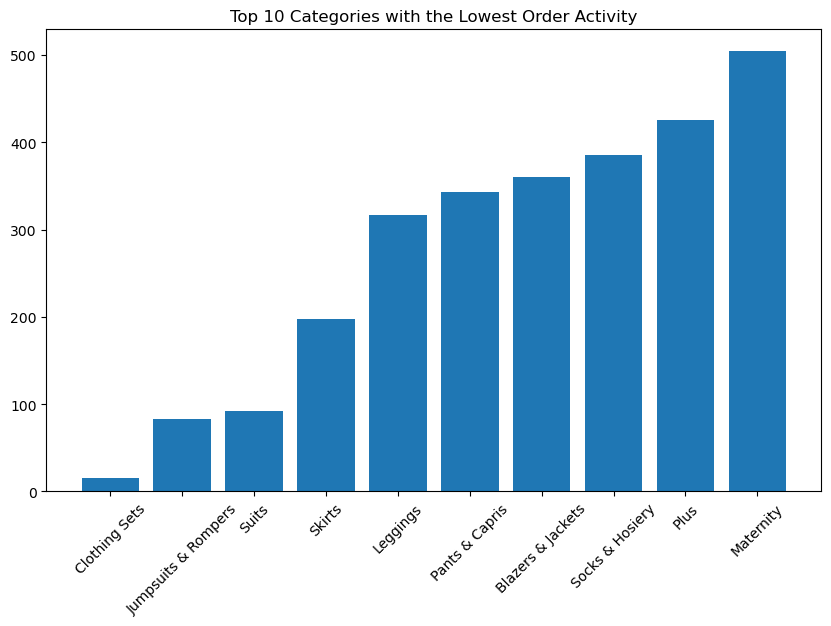

In [29]:
# Total_Count_Value Response 
category_count = df['product_category'].value_counts(ascending = True).head(10)

# buat graph
plt.figure(figsize=(10, 6))  # Atur ukuran figure (lebar, tinggi)
plt.bar(category_count.index, category_count.values)  # Pastikan sumbu x dan y benar
plt.xticks(rotation = 45)
plt.title('Top 10 Categories with the Lowest Order Activity')
plt.show()

Dalam waktu 6 bulan terakhir ada 3 kategori yang benar-benar penjualannya sangat sedikit. Penjualan paling sedikit yaitu clothing set yang mana kategori ini pencapaian penjualan tidak lebih dari 20 buah. Perlu dipertimbangkan untuk menghapus kategori ini atau stok segera dihabiskan dengan adanya promosi atau pemasaran yang lain. Langkah ini perlu dilakukan untuk memastikan kategori ini terjual semua stok nya sehingga tidak adanya penumpukan barang yang terlalu banyak di gudang. 

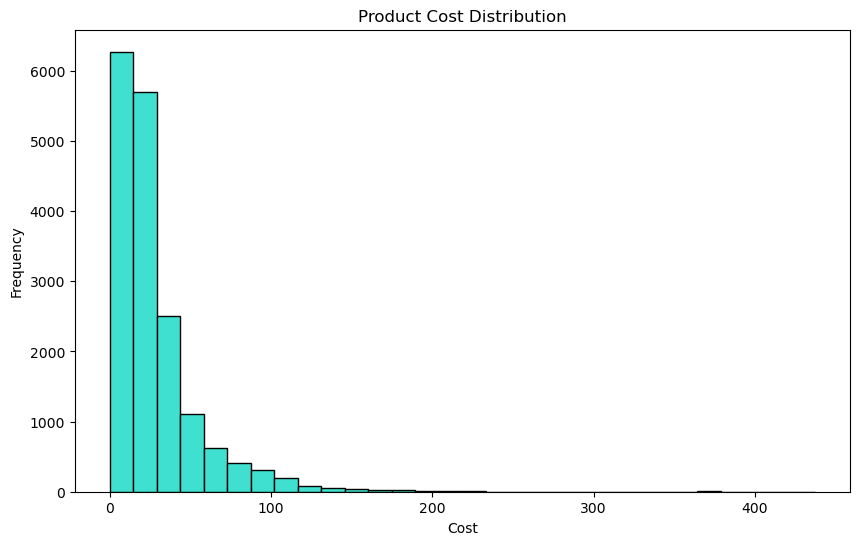

In [30]:
# Membuat histogram dengan data yang sudah difilter
plt.figure(figsize=(10, 6))
# membagi 20 dari histogram
plt.hist(df['cost'], bins=30, color='turquoise', edgecolor='black')
# pemberian tittle dan label
plt.title('Product Cost Distribution')
# deskripsi sumbu x
plt.xlabel('Cost')


# deskripsi sumbu y
plt.ylabel('Frequency')
plt.show()

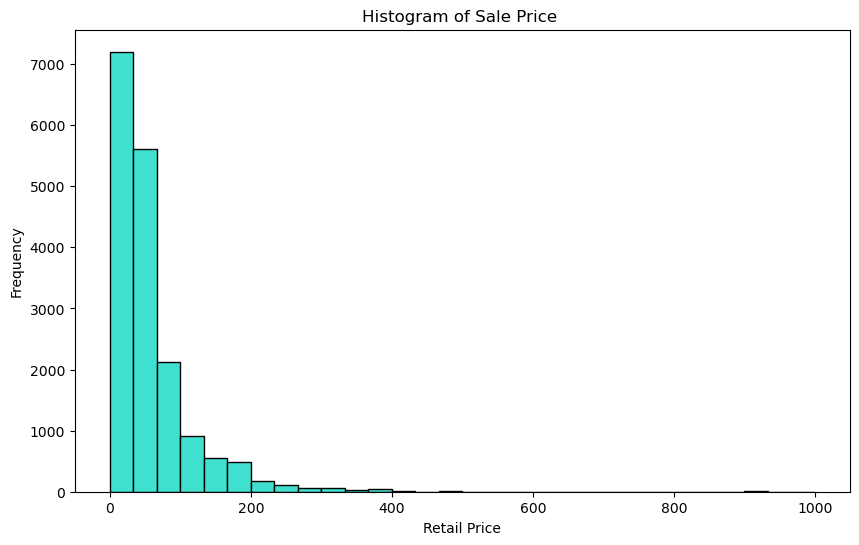

In [31]:
# Membuat histogram dengan data yang sudah difilter
plt.figure(figsize=(10, 6))
# membagi 20 dari histogram
plt.hist(df['sale_price'], bins=30, color='turquoise', edgecolor='black')
# pemberian tittle dan label
plt.title('Histogram of Sale Price ')
# deskripsi sumbu x
plt.xlabel('Retail Price')


# deskripsi sumbu y
plt.ylabel('Frequency')
plt.show()

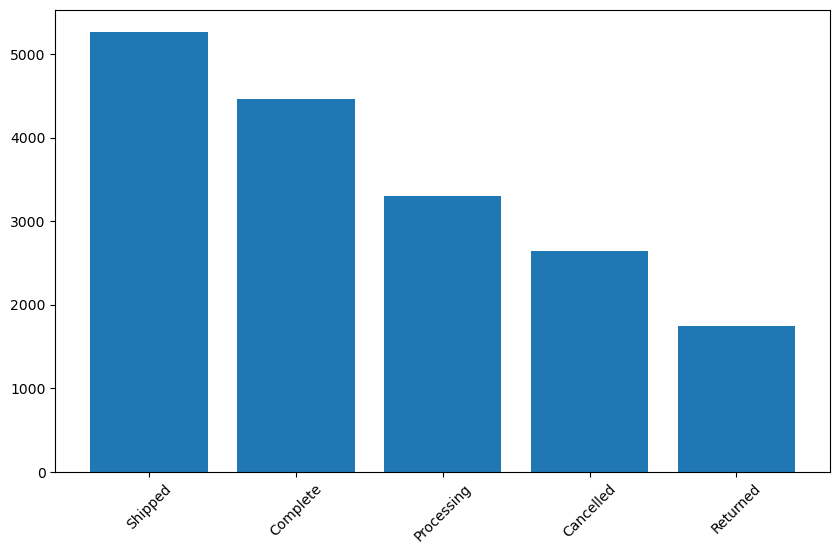

In [32]:
# Total_Count_Value Response 
category_count = df['status'].value_counts(ascending = False).head(10)

# buat graph
plt.figure(figsize=(10, 6))  # Atur ukuran figure (lebar, tinggi)
plt.bar(category_count.index, category_count.values)  # Pastikan sumbu x dan y benar
plt.xticks(rotation = 45)
plt.show()

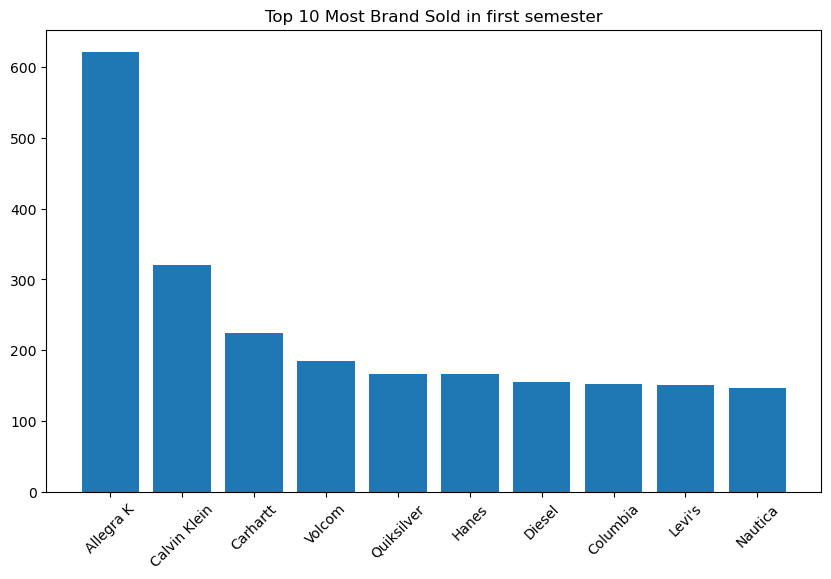

In [33]:
# Total_Count_Value Response 
category_count = df['product_brand'].value_counts(ascending = False).head(10)

# buat graph
plt.figure(figsize=(10, 6))  # Atur ukuran figure (lebar, tinggi)
plt.bar(category_count.index, category_count.values)  # Pastikan sumbu x dan y benar
plt.title('Top 10 Most Brand Sold in first semester')
plt.xticks(rotation = 45)
plt.show()

Terdapat beberapa brand yang menduduki peringkat tertinggi berdasarkan jumlah unit terjual. Brand Allegra K berada di posisi pertama dengan lebih dari 600 unit terjual, diikuti oleh brand Calvin Klein dengan 300 unit, dan Carhart dengan sedikit lebih dari 200 unit. Untuk semester selanjutnya, kita dapat mempersiapkan stok lebih dari 600 unit untuk Allegra K dan 300 unit untuk Calvin Klein. Sementara itu, untuk brand-brand lain, kita cukup menyediakan stok maksimal 200 unit karena terlihat jelas bahwa dari peringkat ke-4 hingga ke-10, tidak ada brand yang mencapai penjualan lebih dari 200 unit. Sebagai antisipasi belanja akhir tahun, angka 200 unit ini bisa dijadikan acuan untuk menghindari overstock.

In [34]:
# Tambahkan kolom baru untuk bulan dan tahun
df['year_month'] = df['created_at'].dt.to_period('M')

df.groupby('year_month')['order_id'].count()

C:\Users\asanm\AppData\Local\Temp\ipykernel_8084\4100995252.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['created_at'].dt.to_period('M')


year_month
2023-01    2821
2023-02    2561
2023-03    2881
2023-04    2893
2023-05    3156
2023-06    3111
Freq: M, Name: order_id, dtype: int64

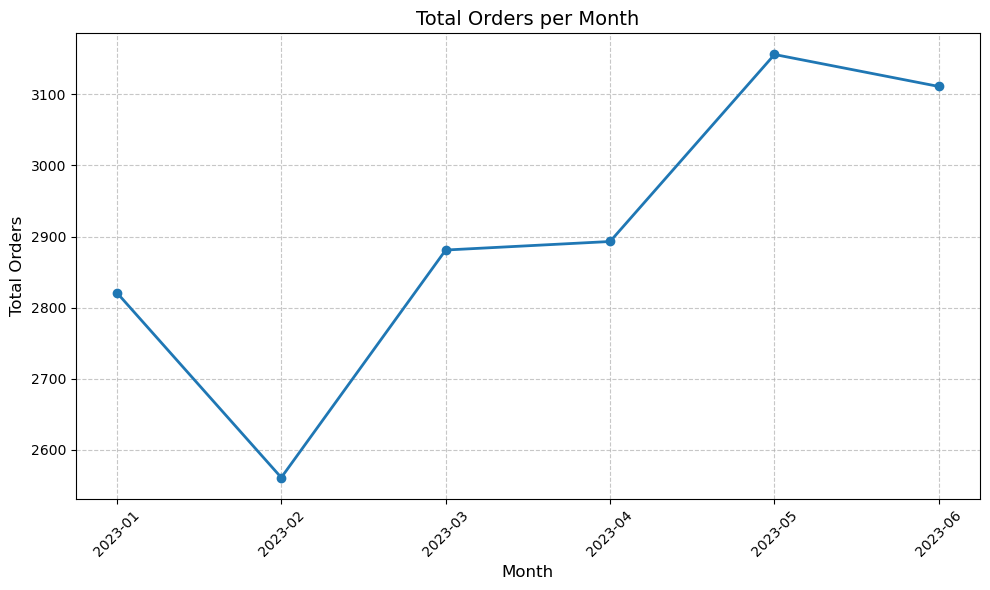

In [35]:
# Hitung jumlah order per bulan
monthly_orders = df.groupby('year_month')['order_id'].count()

# Buat line chart untuk jumlah order per bulan
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o', linestyle='-', linewidth=2)

# Tambahkan label dan judul
plt.title('Total Orders per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan chart
plt.tight_layout()
plt.show()


Line chart menunjukkan fluktuasi jumlah total order per bulan sepanjang 2023, dengan penurunan tajam dari Januari ke Februari, kemungkinan akibat faktor musiman atau penurunan aktivitas belanja. Order kembali meningkat drastis pada Maret dan tetap stabil hingga April, lalu mengalami lonjakan signifikan di Mei yang bisa disebabkan oleh promo atau strategi pemasaran yang efektif. Setelah mencapai puncaknya, jumlah order sedikit menurun pada Juni, menandakan stabilisasi setelah peningkatan sebelumnya. Insight dari grafik ini menunjukkan perlunya analisis lebih lanjut terhadap faktor penyebab penurunan di Februari, serta evaluasi strategi sukses di Mei agar dapat diterapkan kembali untuk menjaga tren positif di bulan-bulan berikutnya.

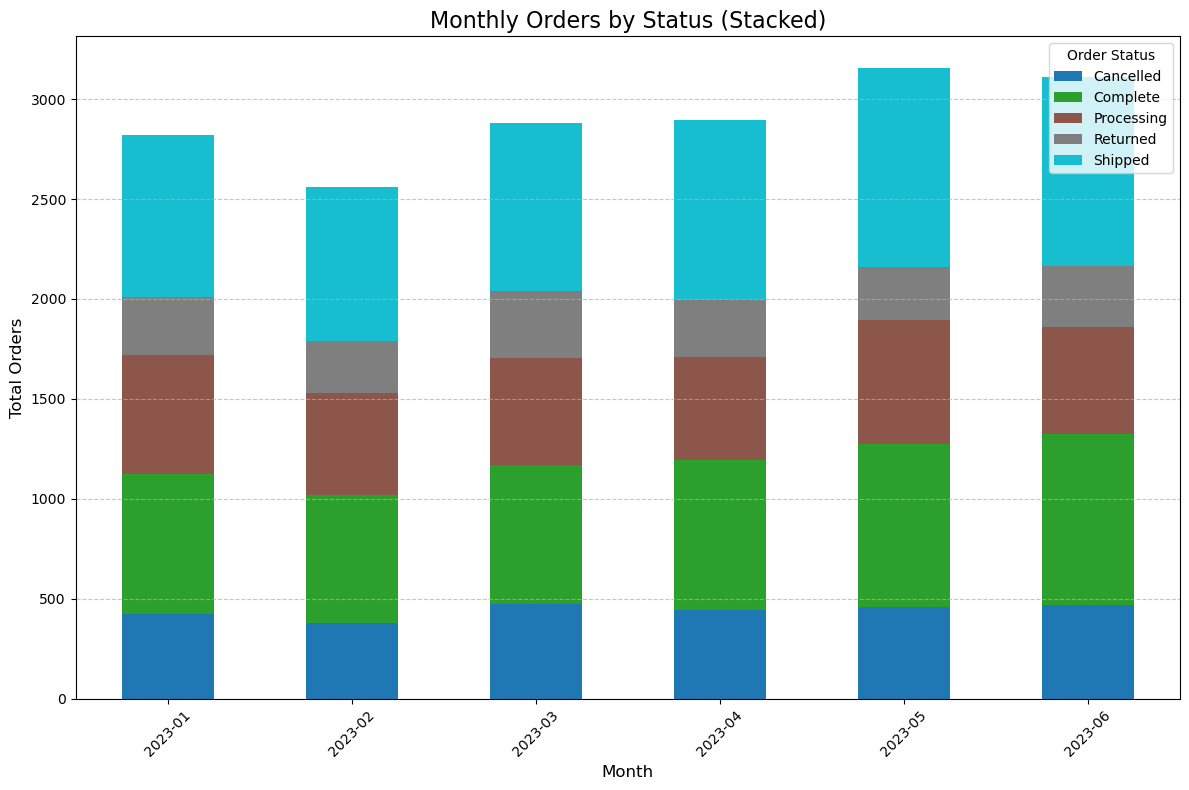

In [36]:
status_monthly_orders = df.groupby(['status', 'year_month'])['order_id'].count().reset_index()
status_monthly_orders.columns = ['Status', 'Year-Month', 'Total Orders']
# Buat stacked bar chart untuk per bulan dan status
# Pivot data untuk mempermudah plot
status_monthly_pivot = status_monthly_orders.pivot(index='Year-Month', columns='Status', values='Total Orders').fillna(0)

# Buat bar plot
status_monthly_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10'
)

# Tambahkan label dan judul
plt.title('Monthly Orders by Status (Stacked)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Order Status', fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

Grafik ini menunjukkan jumlah total order per bulan dengan kategori status order dalam bentuk stacked bar chart, di mana setiap bulan direpresentasikan oleh satu batang yang terdiri dari berbagai warna untuk masing-masing status (Cancelled, Complete, Processing, Returned, Shipped). Dari pola ini, terlihat bahwa jumlah total order mengalami sedikit fluktuasi dari Januari hingga Juni 2023, dengan tren meningkat setelah Februari. Komposisi warna dalam batang menunjukkan bahwa Shipped selalu menjadi kategori terbesar setiap bulan, diikuti oleh Complete dan Processing. Order dengan status Cancelled dan Returned memiliki proporsi lebih kecil tetapi tetap konsisten dalam distribusinya. Peningkatan order di bulan Mei dan Juni mengindikasikan pertumbuhan yang lebih stabil dibandingkan bulan-bulan sebelumnya, yang mungkin dipengaruhi oleh faktor promosi atau peningkatan aktivitas pasar. Kesimpulannya, meskipun jumlah order mengalami variasi bulanan, pola distribusi status order relatif stabil, yang bisa menjadi indikasi bahwa proporsi order yang berhasil diproses tetap terjaga.

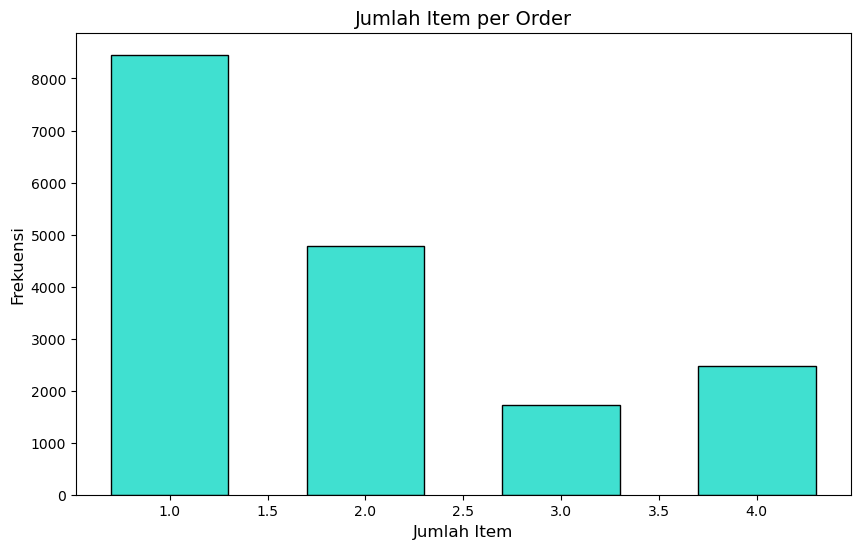

In [37]:
# Hitung jumlah kemunculan setiap jumlah item yang dibeli
num_items_count = df['num_of_item'].value_counts().sort_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(num_items_count.index, num_items_count.values, color='turquoise', edgecolor='black',width = 0.6)

# Pemberian judul dan label
plt.title('Jumlah Item per Order', fontsize=14)
plt.xlabel('Jumlah Item', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=0)

# Menampilkan grafik
plt.show()

Pada grafik ini terlihat bagaimana perilaku konsumen mengenai total item yang di order. Mayoritas order memiliki jumlah item sebanyak 1. Komposisi ini hampir sekitar 50 % orderan itu berisi 1 item. karena mayoritas pembelian di 1 produk maka team gudang harus mempersiapkan kemasan untuk-untuk order-order 1 barang. Dengan menyiapkan kemasan untuk packaging 1 barang maka kita tidak ada momentum kita kehabisan stock untuk kemasan. 

Kita bisa memberikan insight ke team marketing untuk memanfaatkan bundlling dan gratis ongkir atau diskon ongkir supaya consumen condong untuk membeli produk lebih dari pada 1. 

In [38]:
# Hitung lama pengiriman dalam jam
df['lama_pengiriman'] = df['delivered_at'] - df['shipped_at']
df['lama_pengiriman_jam'] = df['lama_pengiriman'] / pd.Timedelta(hours=1)

# Filter data valid (tanpa missing values)
lama_pengiriman_valid = df['lama_pengiriman_jam'].dropna()

# Hitung rata-rata lama pengiriman dalam jam
rata_rata_pengiriman_jam = lama_pengiriman_valid.mean()
print(f"Rata-rata lama pengiriman: {rata_rata_pengiriman_jam:.2f} jam")



Rata-rata lama pengiriman: 59.44 jam


In [39]:
df['lama_pengembalian_jam']= df['returned_at'] - df['shipped_at']
df['lama_pengembalian_jam']=df['lama_pengembalian_jam'] / pd.Timedelta(hours=1)

lama_pengembalian_valid = df['lama_pengembalian_jam'].dropna()

# Hitung rata-rata lama pengiriman dalam jam
rata_rata_pengembalian_jam = lama_pengembalian_valid.mean()
print(f"Rata-rata lama pengembalian: {rata_rata_pengembalian_jam:.2f} jam")

Rata-rata lama pengembalian: 95.20 jam


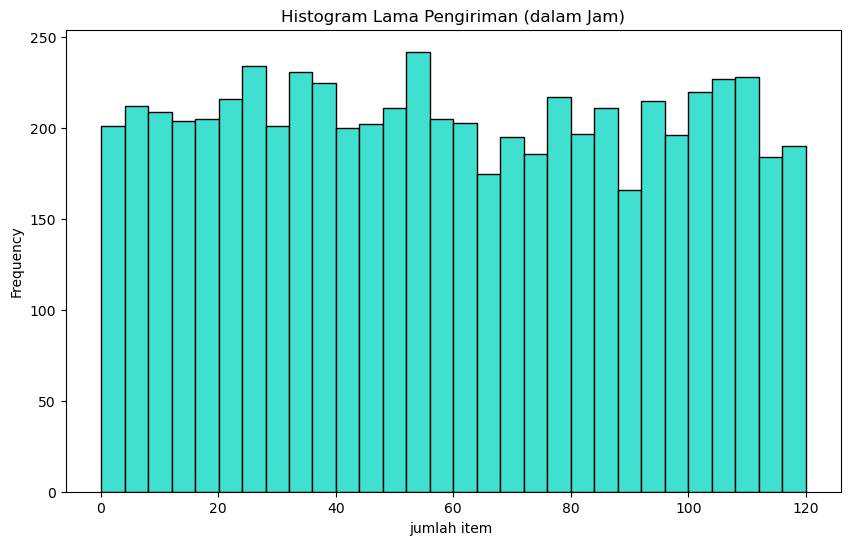

In [40]:
# Membuat histogram dengan data yang sudah difilter
plt.figure(figsize=(10, 6))
# membagi 20 dari histogram
plt.hist(df['lama_pengiriman_jam'], bins=30, color='turquoise', edgecolor='black')
# pemberian tittle dan label
plt.title('Histogram Lama Pengiriman (dalam Jam)')
# deskripsi sumbu x
plt.xlabel('jumlah item ')


# deskripsi sumbu y
plt.ylabel('Frequency')
plt.show()

Grafik histogram menunjukkan distribusi frekuensi lama pengiriman dalam satuan jam, yang tampak relatif merata dengan beberapa variasi kecil. Tidak ada puncak yang sangat dominan, yang mengindikasikan bahwa waktu pengiriman tersebar cukup seragam di seluruh interval waktu. Meskipun terdapat sedikit fluktuasi, seperti frekuensi tertinggi di sekitar pertengahan interval, tidak ada bukti kuat tentang adanya outlier signifikan atau ketimpangan besar dalam pola distribusi waktu pengiriman. Secara keseluruhan, proses pengiriman tampaknya konsisten tanpa adanya kendala signifikan yang memperpanjang waktu tertentu.

In [41]:
df['product_name'].value_counts()

product_name
Ladies Velour Hoody Tracksuit Kangaroo Pocket Fuchsia Pink    7
Mother Tucker Compression V-Neck Tank Top - Nude - Size S     6
Wrangler Men's Premium Performance Cowboy Cut Jean            6
Lee Men's Custom Fit Flat Front Pant                          6
Tuxedo Vest - Solid Satin with Matching Pin Ascot Lime        6
                                                             ..
Ingrid & Isabel Women's Everyday Cami                         1
N2N Pendleton Swim Trunks Camo                                1
C-IN2 Men's Zen Tank Top                                      1
Islandia Belted Plaid Shorts                                  1
Darla                                                         1
Name: count, Length: 12633, dtype: int64

Pola mengenai product name sangat tidak signifikan. Karena memang banyak nama barang sehingga untuk mendeteksi dari nama produk sangat sangat susah. Produk yang sering dibeli disini hanya mempunyai total sebanyak 7 item. 

In [42]:
df['product_distribution_center_id']=df['product_distribution_center_id'].astype(str)

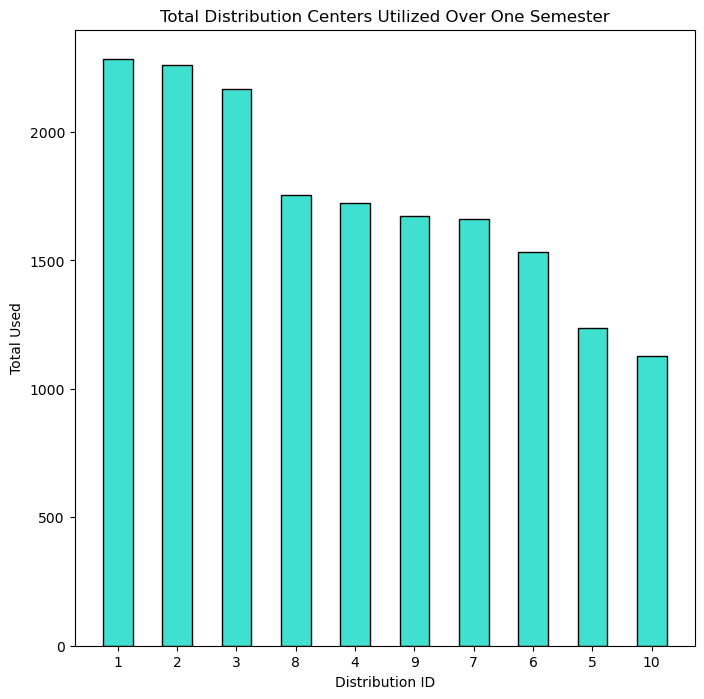

In [43]:
num_count=df['product_distribution_center_id'].value_counts(ascending=False)

plt.figure(figsize=(8,8))
plt.bar(num_count.index,num_count.values, color='turquoise',width=0.5,edgecolor='black')
plt.title ('Total Distribution Centers Utilized Over One Semester')
plt.xlabel ('Distribution ID')
plt.ylabel ('Total Used')
plt.show()

Grafik bar ini menunjukkan distribusi penggunaan berdasarkan Distribution ID, dengan total penggunaan (Total Used) di sepanjang sumbu vertikal. Terlihat bahwa ID distribusi 1, 2, dan 3 memiliki jumlah penggunaan tertinggi, masing-masing berada di atas 2000, sementara jumlah penggunaan berangsur-angsur menurun seiring meningkatnya ID distribusi. Distribution ID 10 mencatatkan jumlah penggunaan terendah. Pola ini menunjukkan bahwa sebagian besar aktivitas atau konsumsi terpusat pada beberapa ID distribusi utama (1-3), sementara ID lainnya memiliki kontribusi yang lebih kecil. Hal ini bisa menjadi indikasi adanya ketergantungan besar pada beberapa sumber distribusi utama dalam sistem.





# Insight and Conclusion 

## Insight 

1. Distribusi Seimbang Pria dan Wanita:

Kedua departemen memiliki kontribusi yang setara terhadap total order selama 6 bulan terakhir, sehingga kebijakan penyetaraan bisa diterapkan di berbagai aspek bisnis.

2. Status Pesanan "Shipped" Mendominasi:

Status "shipped" mencakup 30% dari total order, tetapi perlu investigasi lebih lanjut untuk memastikan apakah pesanan sudah sampai ke pelanggan.

3. Tingginya Status "Processing" (19%):

Banyak pesanan masih tertahan di tahap awal, yang memerlukan strategi lintas divisi atau pengingat otomatis untuk mempercepat proses.

4. Tidak Ada Pola Jelas pada Order yang Dibatalkan:

Pembatalan terjadi merata di berbagai kategori dan brand, sehingga tidak ada penyebab tunggal yang dominan.

5. Return Barang Tidak Fokus pada Kategori atau Brand Tertentu:

Return barang bersifat merata, sehingga upaya untuk menguranginya perlu pendekatan holistik yang mencakup semua kategori.

6. Brand Allegra K, Calvin Klein, dan Carhart Mendominasi:
Allegra K terjual lebih dari 600 unit, Calvin Klein 300 unit, dan Carhart sedikit di atas 200 unit. Stok dapat disesuaikan berdasarkan performa ini.

7. Kategori "Clothing Set" Punya Penjualan Rendah:

Kategori ini hanya terjual kurang dari 20 unit, sehingga perlu dipertimbangkan untuk dipromosikan atau dihapus dari stok.

8. Puncak Order Terjadi di Bulan Mei:

Lonjakan order di bulan Mei kemungkinan disebabkan oleh promosi atau strategi pemasaran yang efektif, yang bisa direplikasi di masa depan.

9. Mayoritas Order Berisi 1 Item:

sekitar 50% pesanan hanya berisi 1 item, sehingga gudang perlu menyiapkan kemasan kecil, dan tim marketing bisa mendorong pembelian multi-item melalui bundling atau diskon ongkir.

10. Ketergantungan Besar pada Distribution ID 1, 2, dan 3:
Tiga distribution center ini menangani mayoritas aktivitas, menunjukkan perlunya diversifikasi jika ingin mengurangi ketergantungan pada pusat tertentu.



## Conclusion 

Dari analisis EDA yang dilakukan, terlihat bahwa distribusi kontribusi pesanan antara departemen pria dan wanita cukup seimbang, menandakan pentingnya penerapan kebijakan penyetaraan di berbagai aspek bisnis seperti pemasaran, pengembangan produk, dan operasional. Namun, terdapat beberapa area kritis yang memerlukan perhatian khusus, seperti tingginya proporsi pesanan dalam status "shipped" dan "processing". Hal ini menunjukkan adanya ambiguitas dalam kejelasan pengiriman serta potensi kendala di tahap awal pemrosesan pesanan yang memerlukan tindakan kolaboratif lintas divisi untuk mempercepat penyelesaian transaksi.

Selain itu, analisis terhadap kategori dan brand menunjukkan bahwa penjualan cenderung terdistribusi merata tanpa dominasi signifikan dari satu kategori. Namun, beberapa brand seperti Allegra K dan Calvin Klein menduduki peringkat teratas dalam jumlah unit terjual, yang memerlukan pengelolaan stok yang lebih besar dibandingkan brand lainnya. Sebaliknya, kategori dengan performa rendah seperti "clothing set" perlu dipertimbangkan untuk dihapus atau dipromosikan secara agresif guna menghindari overstock. Upaya pengurangan jumlah pesanan yang dibatalkan dan return juga tidak dapat difokuskan pada satu kategori atau brand tertentu, tetapi perlu pendekatan menyeluruh yang mencakup semua aspek operasional.

Terakhir, pola pembelian mayoritas yang berisi 1 item menunjukkan bahwa persiapan kemasan kecil di gudang menjadi penting untuk menjaga efisiensi operasional. Selain itu, tim marketing memiliki peluang untuk meningkatkan jumlah pembelian per order melalui promosi bundling atau diskon ongkir. Diversifikasi aktivitas di distribution center juga dapat dipertimbangkan untuk mengurangi ketergantungan besar pada beberapa pusat distribusi utama, sehingga meningkatkan stabilitas dan kelancaran operasional secara keseluruhan. Insight ini dapat menjadi dasar dalam pengambilan keputusan strategis untuk mengoptimalkan performa penjualan dan efisiensi logistik.

# Saving 

In [44]:
df.to_csv('Data The Look Clean.csv',index=False)

In [45]:
df

,order_id,inventory_item_id,gender,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,cost,product_category,product_name,product_brand,product_distribution_center_id,year_month,lama_pengiriman,lama_pengiriman_jam,lama_pengembalian_jam
0,124266,487074,F,Shipped,2023-05-15 06:25:24+00:00,2023-05-11 19:08:00+00:00,NaT,NaT,0.02,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,1,2023-05,NaT,NaN,NaN
1,92782,363599,F,Complete,2023-02-20 15:55:38+00:00,2023-02-21 17:53:00+00:00,2023-02-25 20:43:00+00:00,NaT,0.49,2,0.177380,Accessories,Set of 2 - Replacement Insert For Checkbook Wa...,Made in USA,1,2023-02,4 days 02:50:00,98.833333,NaN
2,29061,113659,M,Processing,2023-01-28 00:48:32+00:00,NaT,NaT,NaT,1.50,2,0.606000,Accessories,Wayfarer Style Sunglasses Dark Lens Black Frame,Wayfayrer,8,2023-01,NaT,NaN,NaN
3,83488,327211,M,Returned,2023-04-26 04:08:20+00:00,2023-04-26 15:20:00+00:00,2023-04-28 23:59:00+00:00,2023-04-30 13:08:00+00:00,1.50,1,0.606000,Accessories,Wayfarer Style Sunglasses Dark Lens Black Frame,Wayfayrer,8,2023-04,2 days 08:39:00,56.650000,93.800000
4,28402,111135,F,Cancelled,2023-04-02 03:21:08+00:00,NaT,NaT,NaT,1.51,4,0.644770,Accessories,Solid Color Leather Adjustable Skinny Belt with,boxed-gifts,10,2023-04,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17418,101840,398985,M,Processing,2023-05-11 10:54:09+00:00,NaT,NaT,NaT,903.00,2,391.902002,Active,The North Face Apex Bionic Soft Shell Jacket -...,The North Face,3,2023-05,NaT,NaN,NaN
17419,124310,487252,F,Processing,2023-02-26 13:06:07+00:00,NaT,NaT,NaT,903.00,2,437.052001,Outerwear & Coats,The North Face Denali Down Womens Jacket 2013,The North Face,3,2023-02,NaT,NaN,NaN
17420,17572,68777,M,Returned,2023-04-20 00:26:49+00:00,2023-04-16 05:32:00+00:00,2023-04-17 02:58:00+00:00,2023-04-19 21:55:00+00:00,903.00,2,370.230002,Active,JORDAN DURASHEEN SHORT MENS 404309-109,Jordan,10,2023-04,0 days 21:26:00,21.433333,88.383333
17421,11489,44912,F,Shipped,2023-02-01 13:34:36+00:00,2023-01-31 06:17:00+00:00,NaT,NaT,903.00,2,375.648001,Active,adidas Women's adiFIT Slim Pant,adidas,4,2023-02,NaT,NaN,NaN
